In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/jr0th/github/segmentation/code/')

import skimage.io
import skimage.morphology
import skimage.segmentation

import sklearn.metrics

import os.path
import os

import numpy as np

import time

debug = True

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
tag = "DL_on_Hand_boundary_4"

mo_data_dir = '/home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/' + tag + '/segm/'
mat_dir = '/home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/' + tag + '/IoU/'
err_img_out_dir = '/home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/' + tag + '/error_img/'

In [3]:
gt_data_dir = '/home/jr0th/github/segmentation/experiments/GT_segmentations/'
path_files_test = '/home/jr0th/github/segmentation/data/BBBC022/test.txt'

In [4]:
with open(path_files_test) as f:
    test_files = f.read().splitlines()

In [5]:
def visualize(mat, seg_gt, seg_model):

    # get number of nuclei
    nb_nuc_gt = mat.shape[0]
    nb_nuc_model = mat.shape[1]
    
    if debug:
        print('# nuclei ground truth', nb_nuc_gt)
        print('# nuclei model', nb_nuc_model)
    
    # only allow assignments if IoU is at least 0.5
    detection_map = (mat > 0.5)
    nb_matches = np.sum(detection_map)
    detection_map_gt = np.sum(detection_map, 1)
    detection_map_model = np.sum(detection_map, 0)
    
    # mask with matches
    detection_rate = mat * detection_map
    
    nb_overdetection = nb_nuc_model - nb_matches
    nb_underdetection = nb_nuc_gt - nb_matches
    
    if debug:
        print('# matches', nb_matches)
        print('# overdetections', nb_overdetection)
        print('# underdetections', nb_underdetection)
        
    mean_IoU = np.mean(np.sum(detection_rate, axis = 1))
    
    if debug:
        print('# mean IoU', mean_IoU)
    
    # plot masked matrix
    plt.figure(figsize=(10,10))
    plt.matshow(detection_rate)
    plt.show()
    
    # get indices of mislabeled cells
    error_underdetected = np.nonzero(detection_map_gt == 0)[0] + 1
    error_overdetected = np.nonzero(detection_map_model == 0)[0] + 1

    # get empty buffer image
    error_img = np.zeros((seg_model.shape[0], seg_model.shape[1], 3), dtype = np.ubyte)

    # color image
    brownish = [172, 128, 0]
    blueish = [31, 190, 214]
    for error in error_underdetected:
        # brownish: underdetected
        error_img[seg_gt == error, :] = brownish
    for error in error_overdetected:
        # blueish: overdetected
        error_img[seg_model == error, :] = error_img[seg_model == error, :] + blueish
        
    # pixels where under- and overdetection occured appear in pink
    
    return error_img

    

# nuclei ground truth 51
# nuclei model 51
# matches 51
# overdetections 0
# underdetections 0
# mean IoU 0.760187


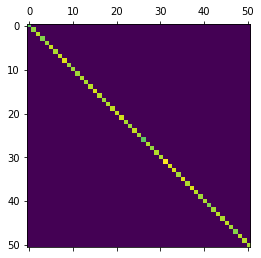

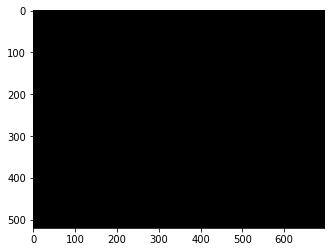

# nuclei ground truth 84
# nuclei model 82
# matches 81
# overdetections 1
# underdetections 3
# mean IoU 0.737569


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_P21_s4_w19B7DC88B-10BB-4B51-9A10-9E30285688C1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


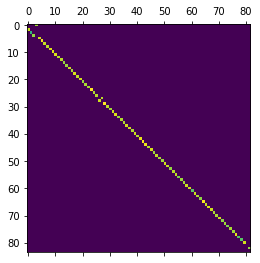

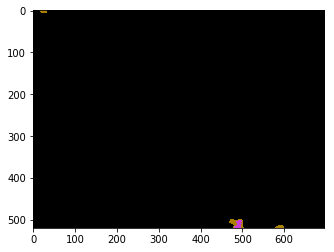

# nuclei ground truth 77
# nuclei model 65
# matches 64
# overdetections 1
# underdetections 13
# mean IoU 0.591123


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_P19_s6_w10EBAD15B-2822-48B9-B9C8-4DF5D80AB940.png is a low contrast image
  warn('%s is a low contrast image' % fname)


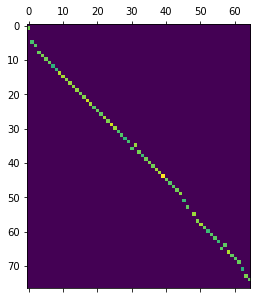

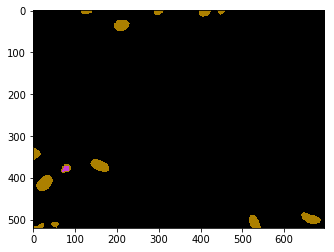

# nuclei ground truth 97
# nuclei model 82
# matches 79
# overdetections 3
# underdetections 18
# mean IoU 0.623266


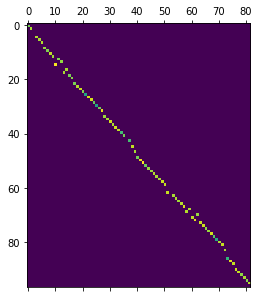

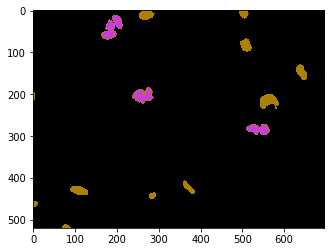

# nuclei ground truth 44
# nuclei model 42
# matches 42
# overdetections 0
# underdetections 2
# mean IoU 0.736136


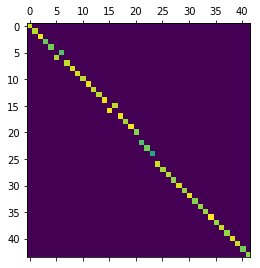

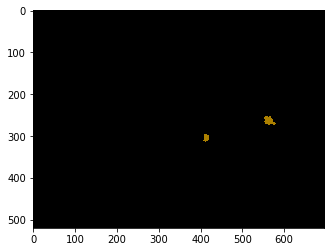

# nuclei ground truth 87
# nuclei model 85
# matches 84
# overdetections 1
# underdetections 3
# mean IoU 0.731915


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_P07_s8_w19D682C29-5685-4A33-8CAA-F0797DD7F021.png is a low contrast image
  warn('%s is a low contrast image' % fname)


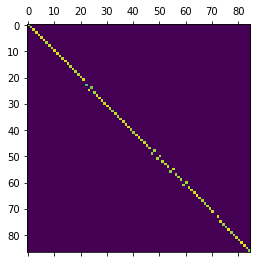

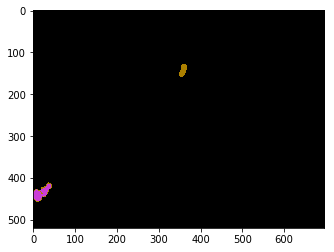

# nuclei ground truth 69
# nuclei model 64
# matches 62
# overdetections 2
# underdetections 7
# mean IoU 0.692241


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_O04_s2_w19A18B0D8-8E8B-4572-A5C0-5C678F3AD54C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


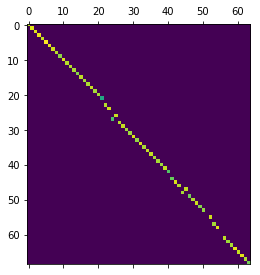

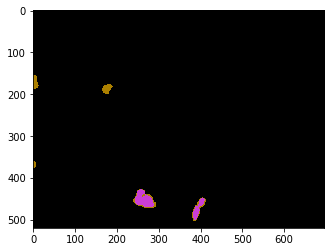

# nuclei ground truth 74
# nuclei model 70
# matches 68
# overdetections 2
# underdetections 6
# mean IoU 0.674659


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_O02_s4_w1814603DA-DD56-44EF-98C5-AFF3B636F986.png is a low contrast image
  warn('%s is a low contrast image' % fname)


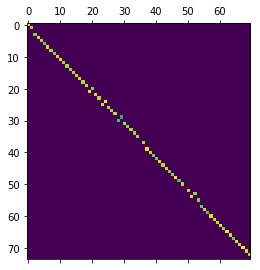

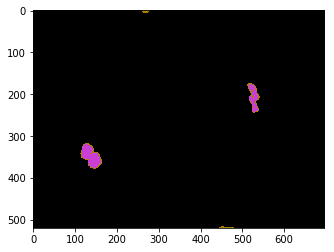

# nuclei ground truth 25
# nuclei model 21
# matches 20
# overdetections 1
# underdetections 5
# mean IoU 0.593178


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_O01_s6_w11A23978B-BAAD-4287-B1F6-FFBCF45C5E2F.png is a low contrast image
  warn('%s is a low contrast image' % fname)


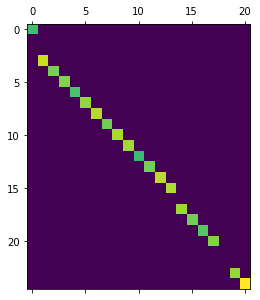

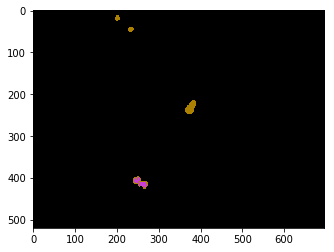

# nuclei ground truth 138
# nuclei model 124
# matches 121
# overdetections 3
# underdetections 17
# mean IoU 0.659855


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_N21_s1_w14F264B20-62D6-47EC-9BCD-B9416AB302D9.png is a low contrast image
  warn('%s is a low contrast image' % fname)


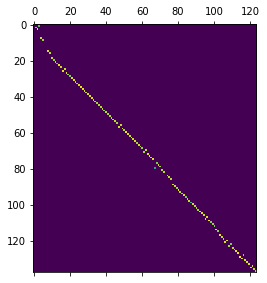

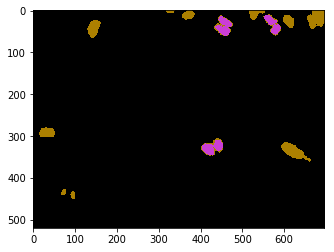

# nuclei ground truth 84
# nuclei model 75
# matches 72
# overdetections 3
# underdetections 12
# mean IoU 0.643421


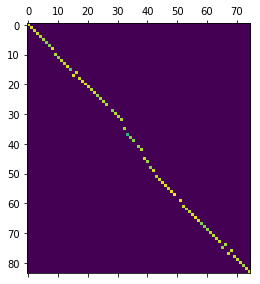

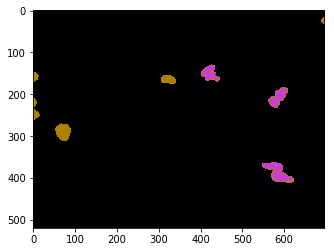

# nuclei ground truth 113
# nuclei model 106
# matches 102
# overdetections 4
# underdetections 11
# mean IoU 0.681127


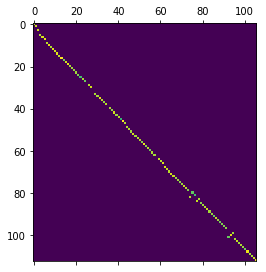

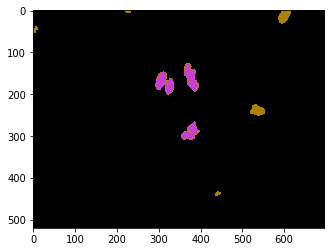

# nuclei ground truth 142
# nuclei model 133
# matches 127
# overdetections 6
# underdetections 15
# mean IoU 0.667856


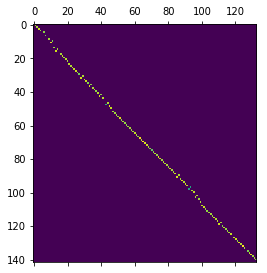

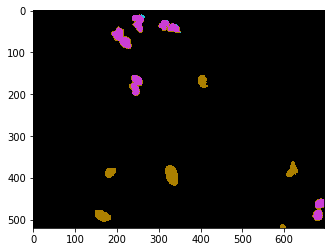

# nuclei ground truth 184
# nuclei model 162
# matches 147
# overdetections 15
# underdetections 37
# mean IoU 0.606109


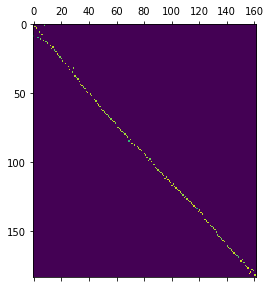

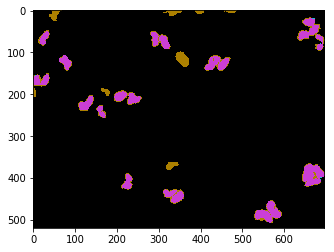

# nuclei ground truth 179
# nuclei model 149
# matches 140
# overdetections 9
# underdetections 39
# mean IoU 0.580948


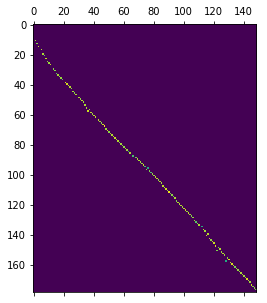

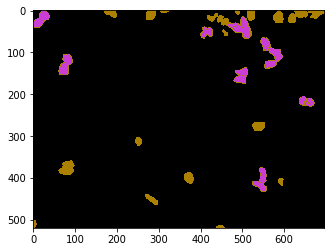

# nuclei ground truth 141
# nuclei model 125
# matches 125
# overdetections 0
# underdetections 16
# mean IoU 0.655372


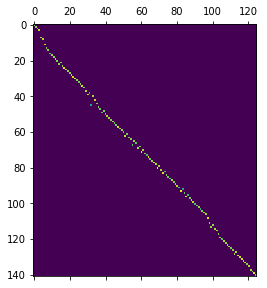

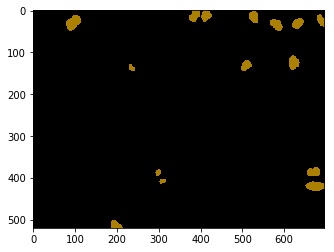

# nuclei ground truth 132
# nuclei model 122
# matches 117
# overdetections 5
# underdetections 15
# mean IoU 0.675383


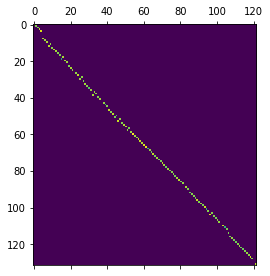

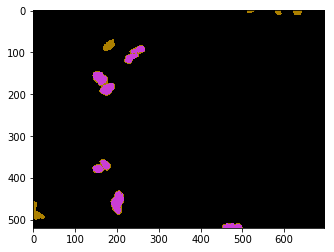

# nuclei ground truth 128
# nuclei model 113
# matches 110
# overdetections 3
# underdetections 18
# mean IoU 0.645975


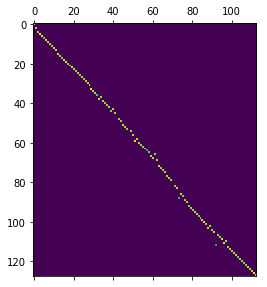

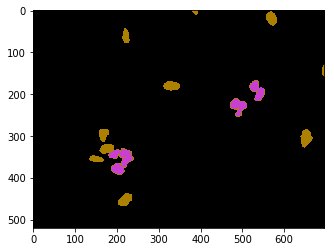

# nuclei ground truth 105
# nuclei model 85
# matches 81
# overdetections 4
# underdetections 24
# mean IoU 0.584033


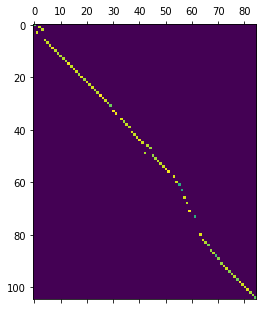

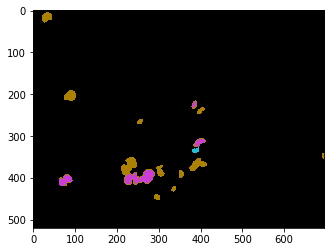

# nuclei ground truth 95
# nuclei model 88
# matches 86
# overdetections 2
# underdetections 9
# mean IoU 0.69708


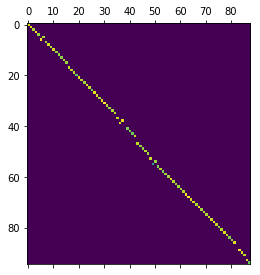

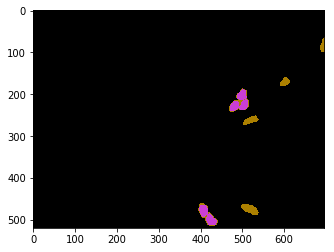

# nuclei ground truth 76
# nuclei model 70
# matches 66
# overdetections 4
# underdetections 10
# mean IoU 0.620996


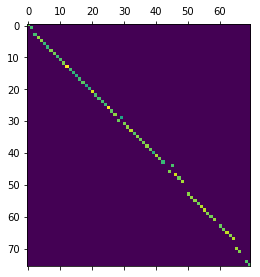

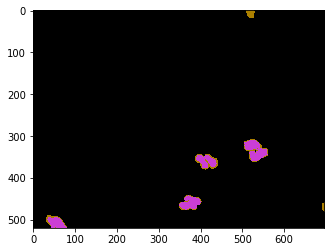

# nuclei ground truth 136
# nuclei model 128
# matches 121
# overdetections 7
# underdetections 15
# mean IoU 0.663807


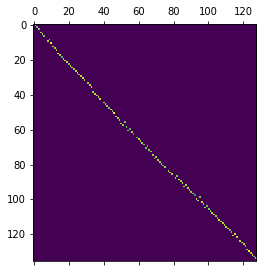

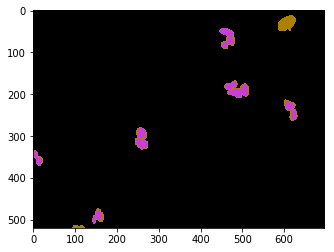

# nuclei ground truth 34
# nuclei model 30
# matches 27
# overdetections 3
# underdetections 7
# mean IoU 0.588217


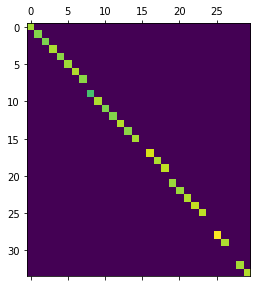

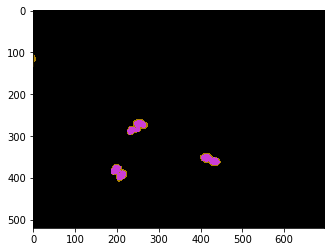

# nuclei ground truth 124
# nuclei model 109
# matches 104
# overdetections 5
# underdetections 20
# mean IoU 0.613327


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_I23_s5_w1E3053D6B-8CEF-48E3-A6A5-2F0D7C1AA177.png is a low contrast image
  warn('%s is a low contrast image' % fname)


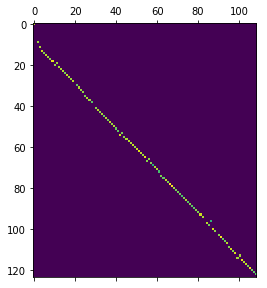

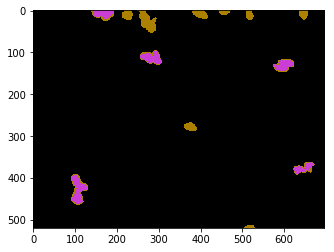

# nuclei ground truth 138
# nuclei model 128
# matches 127
# overdetections 1
# underdetections 11
# mean IoU 0.674799


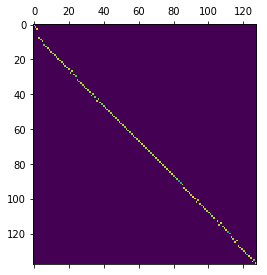

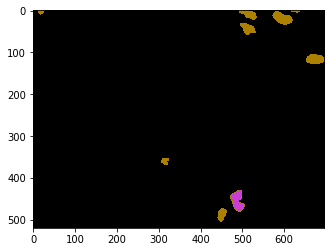

# nuclei ground truth 197
# nuclei model 163
# matches 148
# overdetections 15
# underdetections 49
# mean IoU 0.558295


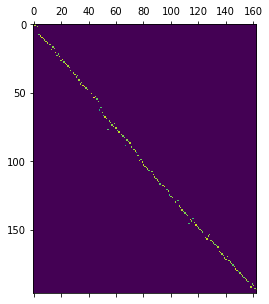

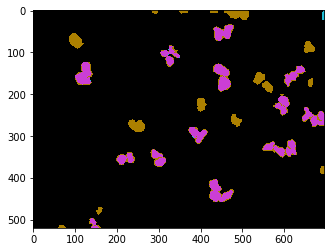

# nuclei ground truth 126
# nuclei model 112
# matches 108
# overdetections 4
# underdetections 18
# mean IoU 0.650094


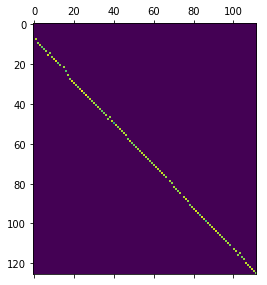

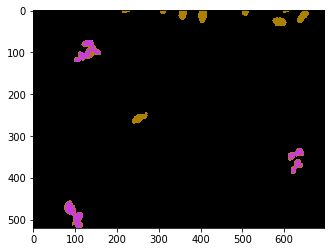

# nuclei ground truth 117
# nuclei model 106
# matches 103
# overdetections 3
# underdetections 14
# mean IoU 0.660836


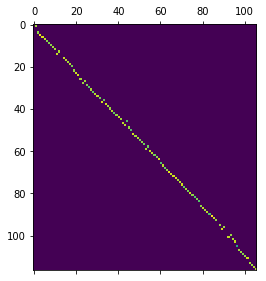

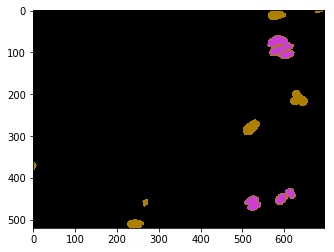

# nuclei ground truth 79
# nuclei model 73
# matches 72
# overdetections 1
# underdetections 7
# mean IoU 0.677665


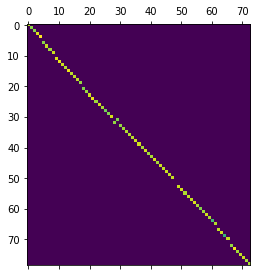

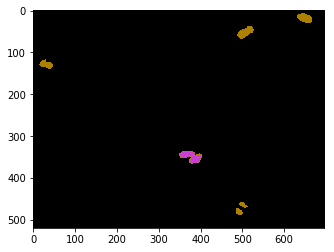

# nuclei ground truth 112
# nuclei model 103
# matches 100
# overdetections 3
# underdetections 12
# mean IoU 0.674452


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4A69ED1C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


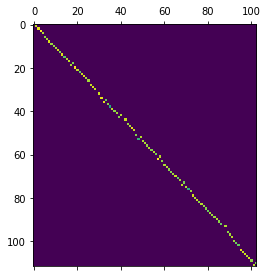

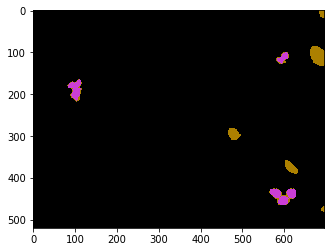

# nuclei ground truth 7
# nuclei model 7
# matches 7
# overdetections 0
# underdetections 0
# mean IoU 0.709207


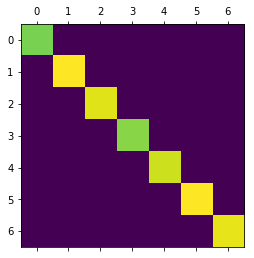

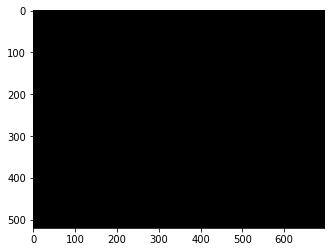

# nuclei ground truth 58
# nuclei model 50
# matches 47
# overdetections 3
# underdetections 11
# mean IoU 0.603747


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_F12_s8_w1DBD80811-5297-4415-ACD1-EC9286BE76A4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


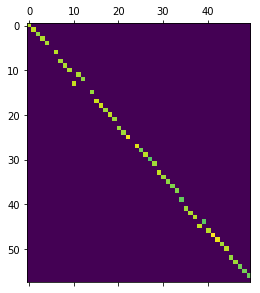

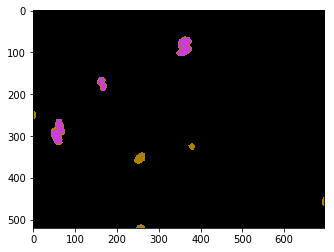

# nuclei ground truth 101
# nuclei model 99
# matches 99
# overdetections 0
# underdetections 2
# mean IoU 0.742616


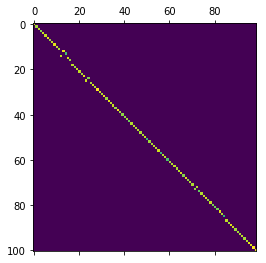

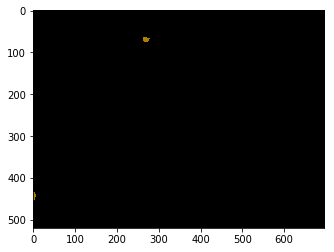

# nuclei ground truth 131
# nuclei model 119
# matches 111
# overdetections 8
# underdetections 20
# mean IoU 0.651162


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_F04_s5_w1D94DA1A2-873C-44B3-80EB-36DC2A97E9A3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


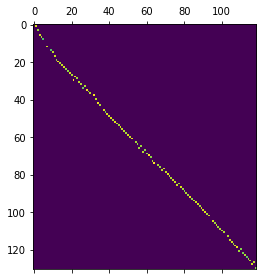

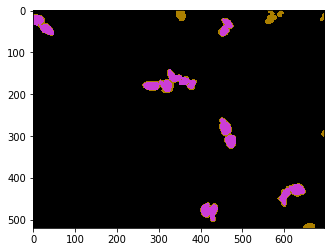

# nuclei ground truth 152
# nuclei model 135
# matches 127
# overdetections 8
# underdetections 25
# mean IoU 0.637787


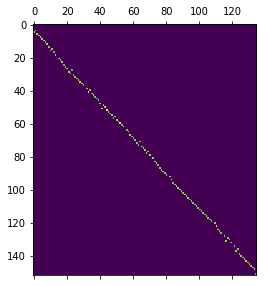

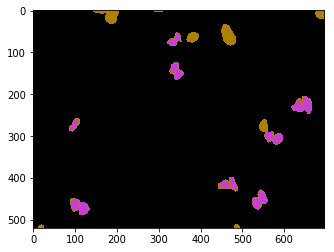

# nuclei ground truth 160
# nuclei model 150
# matches 147
# overdetections 3
# underdetections 13
# mean IoU 0.700833


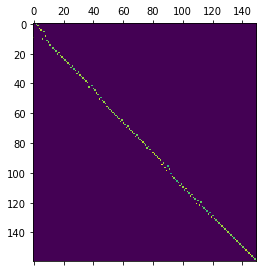

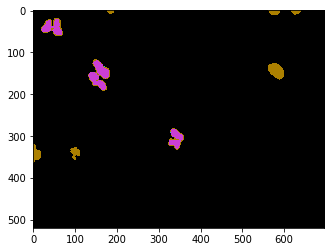

# nuclei ground truth 134
# nuclei model 123
# matches 119
# overdetections 4
# underdetections 15
# mean IoU 0.664223


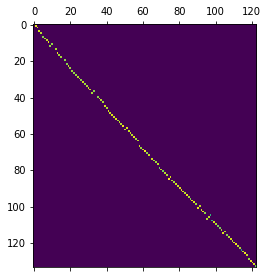

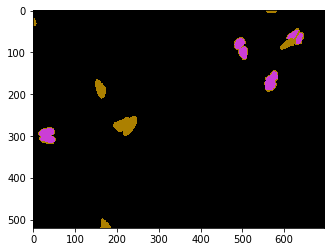

# nuclei ground truth 35
# nuclei model 30
# matches 28
# overdetections 2
# underdetections 7
# mean IoU 0.57923


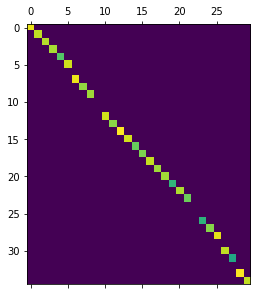

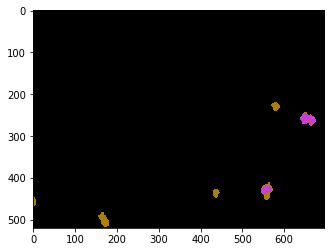

# nuclei ground truth 151
# nuclei model 139
# matches 136
# overdetections 3
# underdetections 15
# mean IoU 0.6671


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_D08_s7_w1F476A544-A07C-4E9B-A6CB-BAEF4CD6F64E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


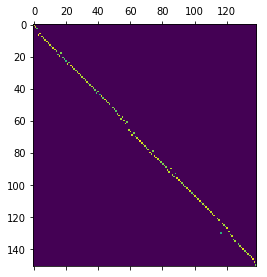

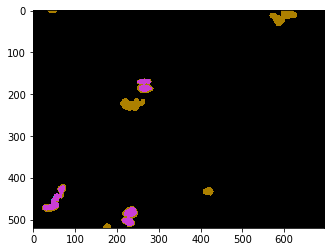

# nuclei ground truth 95
# nuclei model 88
# matches 84
# overdetections 4
# underdetections 11
# mean IoU 0.636787


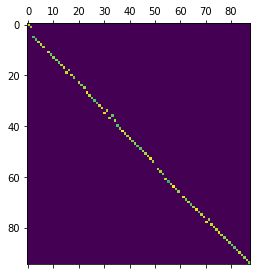

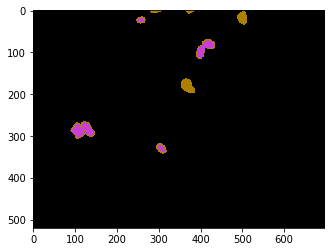

# nuclei ground truth 109
# nuclei model 99
# matches 96
# overdetections 3
# underdetections 13
# mean IoU 0.677209


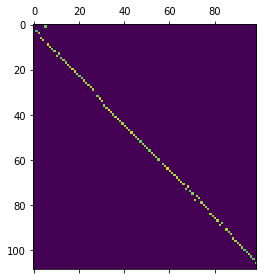

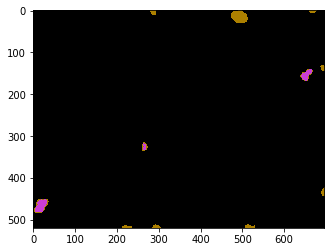

# nuclei ground truth 124
# nuclei model 116
# matches 114
# overdetections 2
# underdetections 10
# mean IoU 0.706896


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_C23_s2_w10533E965-3DC3-4556-9C26-EA8DD4F8DE61.png is a low contrast image
  warn('%s is a low contrast image' % fname)


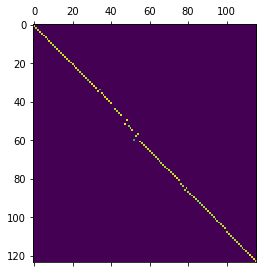

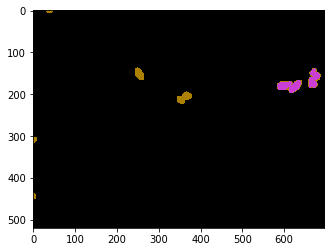

# nuclei ground truth 145
# nuclei model 135
# matches 131
# overdetections 4
# underdetections 14
# mean IoU 0.658902


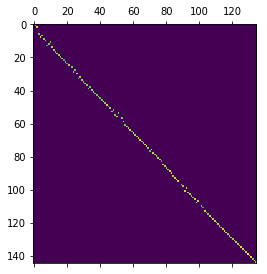

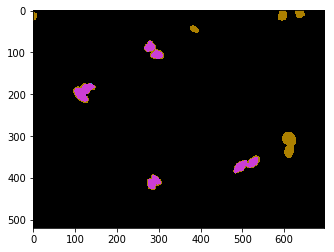

# nuclei ground truth 108
# nuclei model 100
# matches 98
# overdetections 2
# underdetections 10
# mean IoU 0.707513


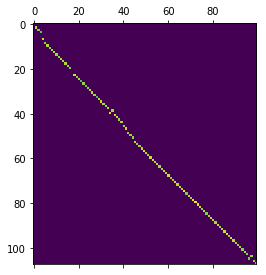

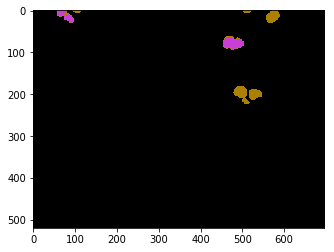

# nuclei ground truth 109
# nuclei model 103
# matches 103
# overdetections 0
# underdetections 6
# mean IoU 0.701796


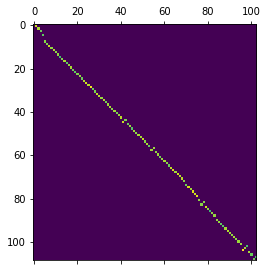

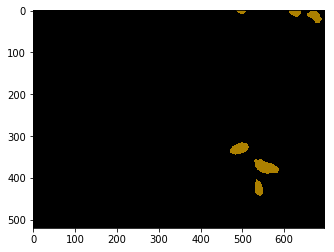

# nuclei ground truth 61
# nuclei model 55
# matches 54
# overdetections 1
# underdetections 7
# mean IoU 0.688933


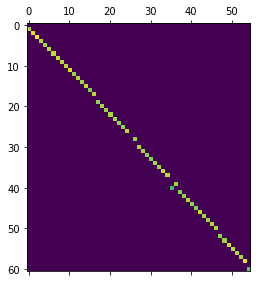

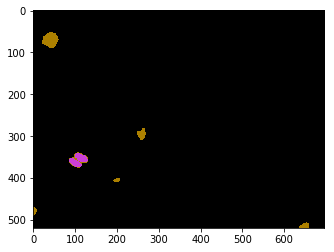

# nuclei ground truth 88
# nuclei model 81
# matches 79
# overdetections 2
# underdetections 9
# mean IoU 0.679517


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_B02_s9_w124B5080D-EBE1-47D2-B147-C0F342039EDF.png is a low contrast image
  warn('%s is a low contrast image' % fname)


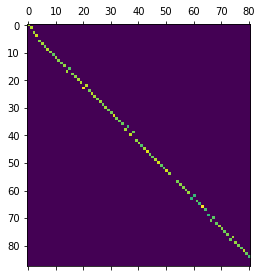

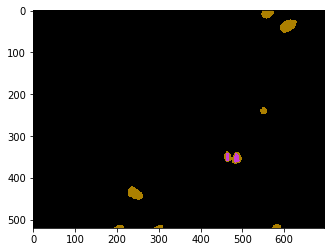

# nuclei ground truth 86
# nuclei model 83
# matches 82
# overdetections 1
# underdetections 4
# mean IoU 0.728072


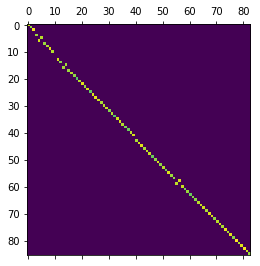

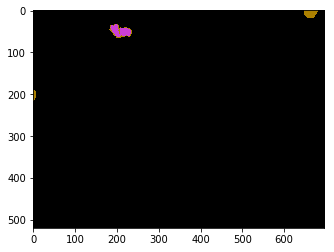

# nuclei ground truth 19
# nuclei model 9
# matches 9
# overdetections 0
# underdetections 10
# mean IoU 0.360081


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_4/error_img/IXMtest_A16_s2_w15AF20A10-82AE-48FA-AC50-7AE8AC3AA544.png is a low contrast image
  warn('%s is a low contrast image' % fname)


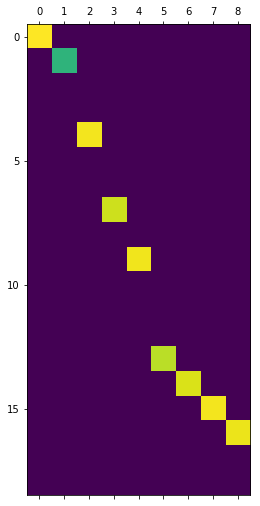

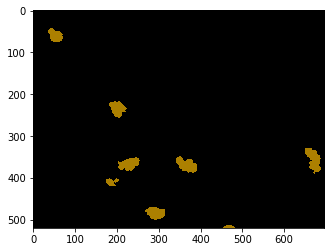

# nuclei ground truth 149
# nuclei model 142
# matches 137
# overdetections 5
# underdetections 12
# mean IoU 0.663755


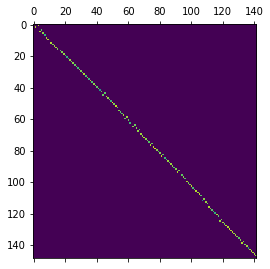

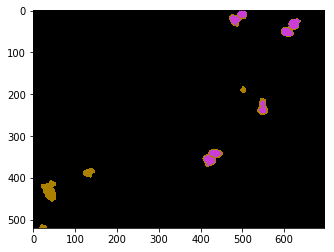

In [6]:
for filename in test_files:
    
    filename_wo_ext = os.path.splitext(filename)[0]
    
    # load error matrices
    IoU = np.load(mat_dir + filename_wo_ext + '.npy')

    # load segmentations
    seg_gt = skimage.io.imread(gt_data_dir + filename)
    seg_mo = skimage.io.imread(mo_data_dir + filename)
    
    # visualize only if matrices are full (no empty images and some detection)
    if(IoU.size != 0):
        error_img = visualize(IoU, seg_gt, seg_mo)
        plt.imshow(error_img)
        plt.show()
        skimage.io.imsave(err_img_out_dir + filename, error_img)
        